# Prepare rules for the my movies the data sets
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 

## Data Description:

- Columns : Name Of Movies
- Row : Number Of People

## Attaching Resources

### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

### Adding Dataset

In [2]:
mm = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Data-Science-Assignments/main/Assignment_09_Association%20Rules/Dataset/my_movies.csv')

mm

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [3]:
mm.drop(columns = ['V1', 'V2', 'V3', 'V4', 'V5'], inplace = True)

mm

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


## Performing EDA In Dataset

### Applying Descriptive Statistics

In [4]:
mm.sum()

Sixth Sense      6
Gladiator        7
LOTR1            2
Harry Potter1    2
Patriot          6
LOTR2            2
Harry Potter2    1
LOTR             1
Braveheart       1
Green Mile       2
dtype: int64

In [5]:
mm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


In [6]:
mm.isna().sum()

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [7]:
def uni(df):

    for i in range(len(df.columns)):
        print('\n All Unique Value in ' + str(df.columns[i]))
        print(np.sort(df[df.columns[i]].unique()))
        print('Total no of unique values ' +
                str(len(df[df.columns[i]].unique())))


In [8]:
uni(mm)



 All Unique Value in Sixth Sense
[0 1]
Total no of unique values 2

 All Unique Value in Gladiator
[0 1]
Total no of unique values 2

 All Unique Value in LOTR1
[0 1]
Total no of unique values 2

 All Unique Value in Harry Potter1
[0 1]
Total no of unique values 2

 All Unique Value in Patriot
[0 1]
Total no of unique values 2

 All Unique Value in LOTR2
[0 1]
Total no of unique values 2

 All Unique Value in Harry Potter2
[0 1]
Total no of unique values 2

 All Unique Value in LOTR
[0 1]
Total no of unique values 2

 All Unique Value in Braveheart
[0 1]
Total no of unique values 2

 All Unique Value in Green Mile
[0 1]
Total no of unique values 2


### Visualizing The Data

In [9]:
count = mm.sum()
count.sort_values(0, ascending = False, inplace=True)
count = count.to_frame().reset_index()
count = count.rename(columns = {'index': 'items',0: 'count'})
count

,items,count
0,Gladiator,7
1,Sixth Sense,6
2,Patriot,6
3,LOTR1,2
4,Harry Potter1,2
5,LOTR2,2
6,Green Mile,2
7,Harry Potter2,1
8,LOTR,1
9,Braveheart,1


#### Ploting Barplot

Text(0.5, 1.0, 'Movies Purchase Frequency')

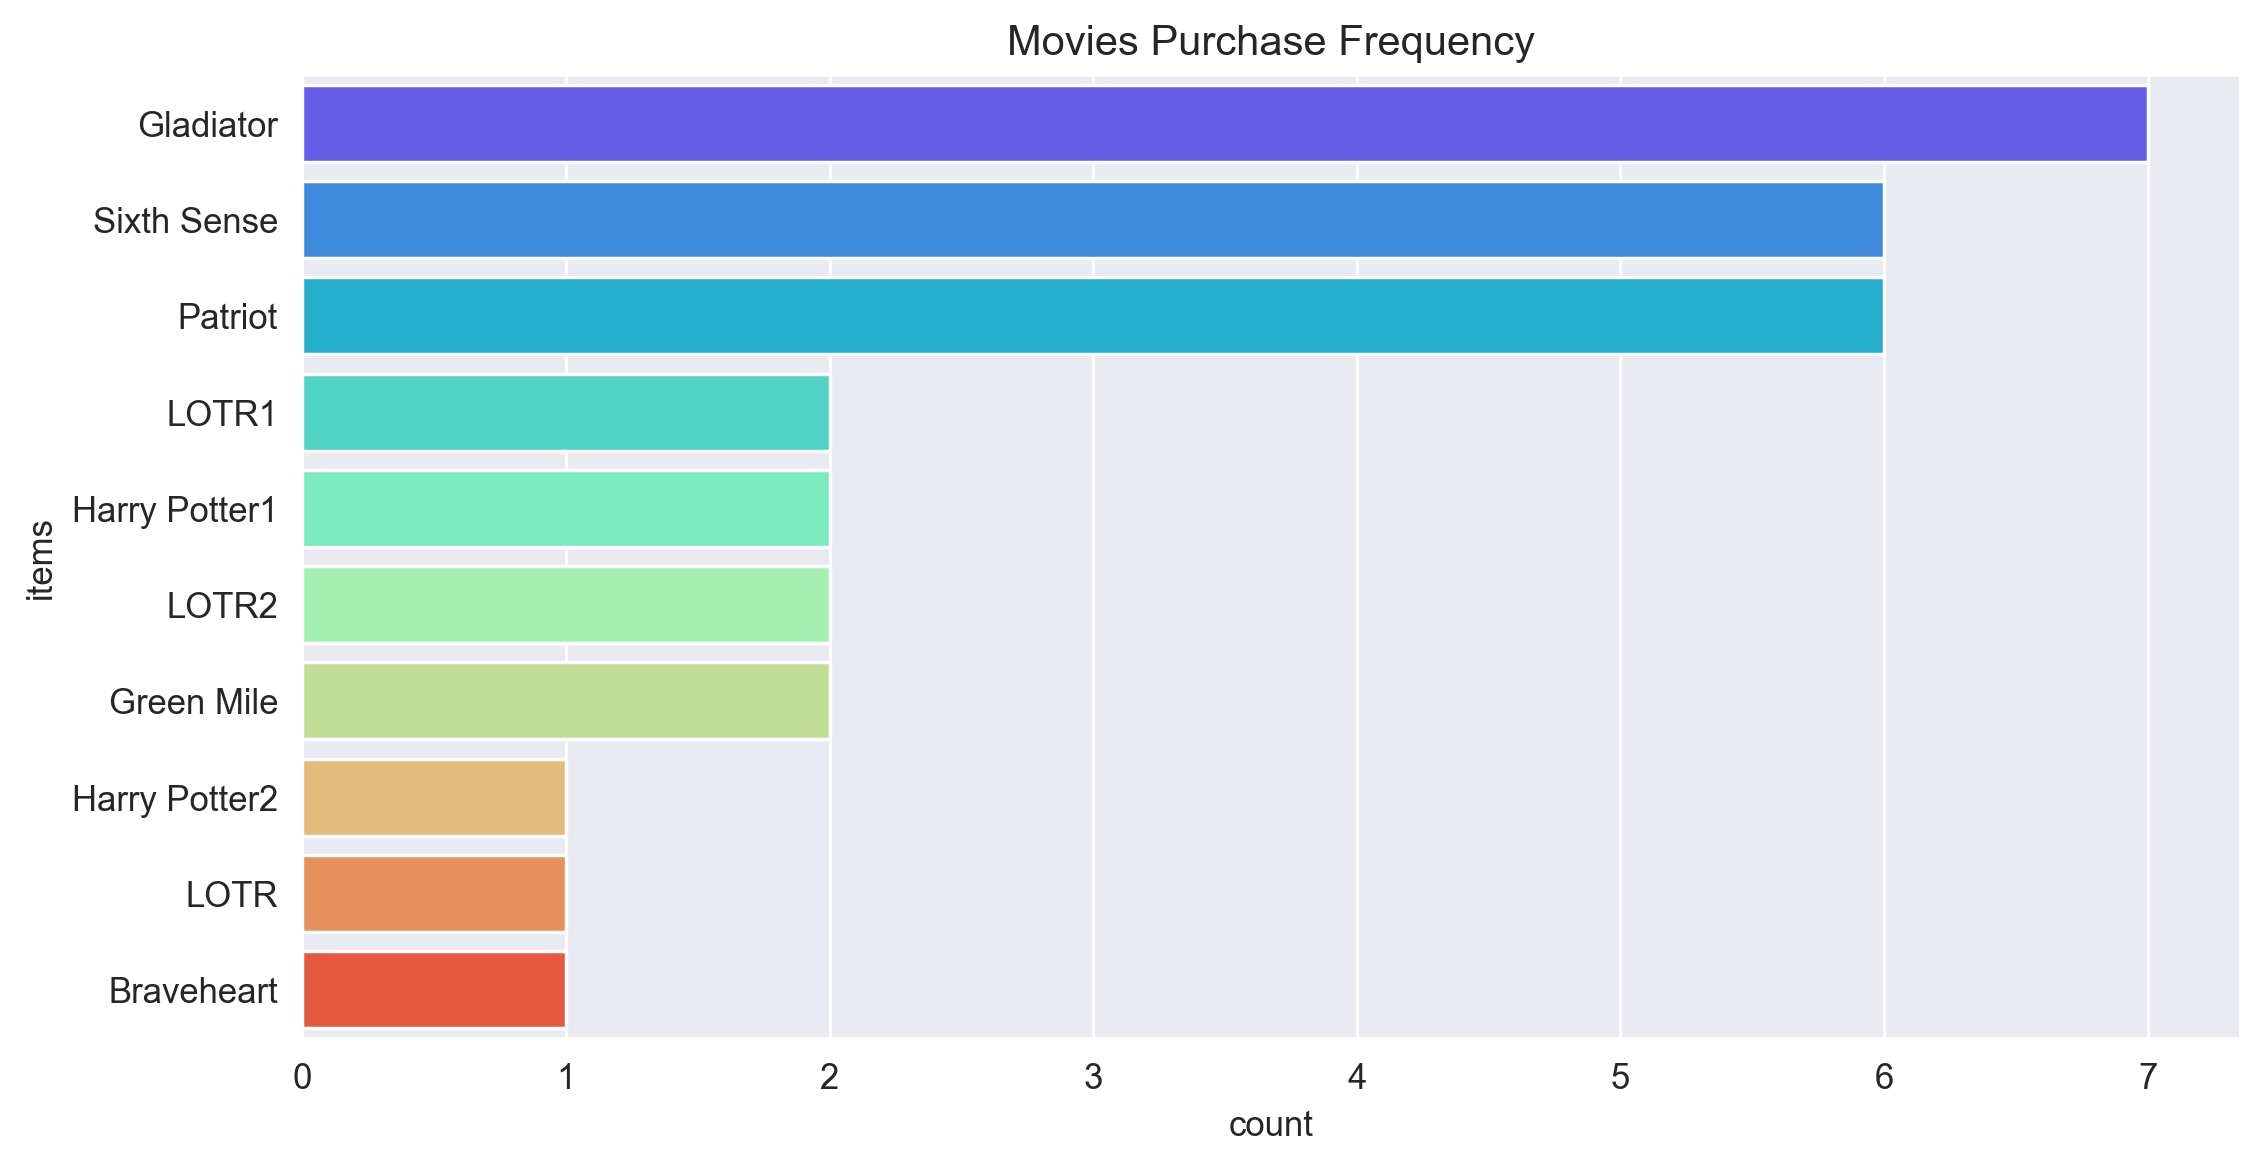

In [10]:
sns.barplot(x = 'count', y = 'items', data = count, palette = 'rainbow')
plt.title('Movies Purchase Frequency')

#### Ploting Pieplot

Text(0.5, 1.0, 'Market Share Of Each Movie')

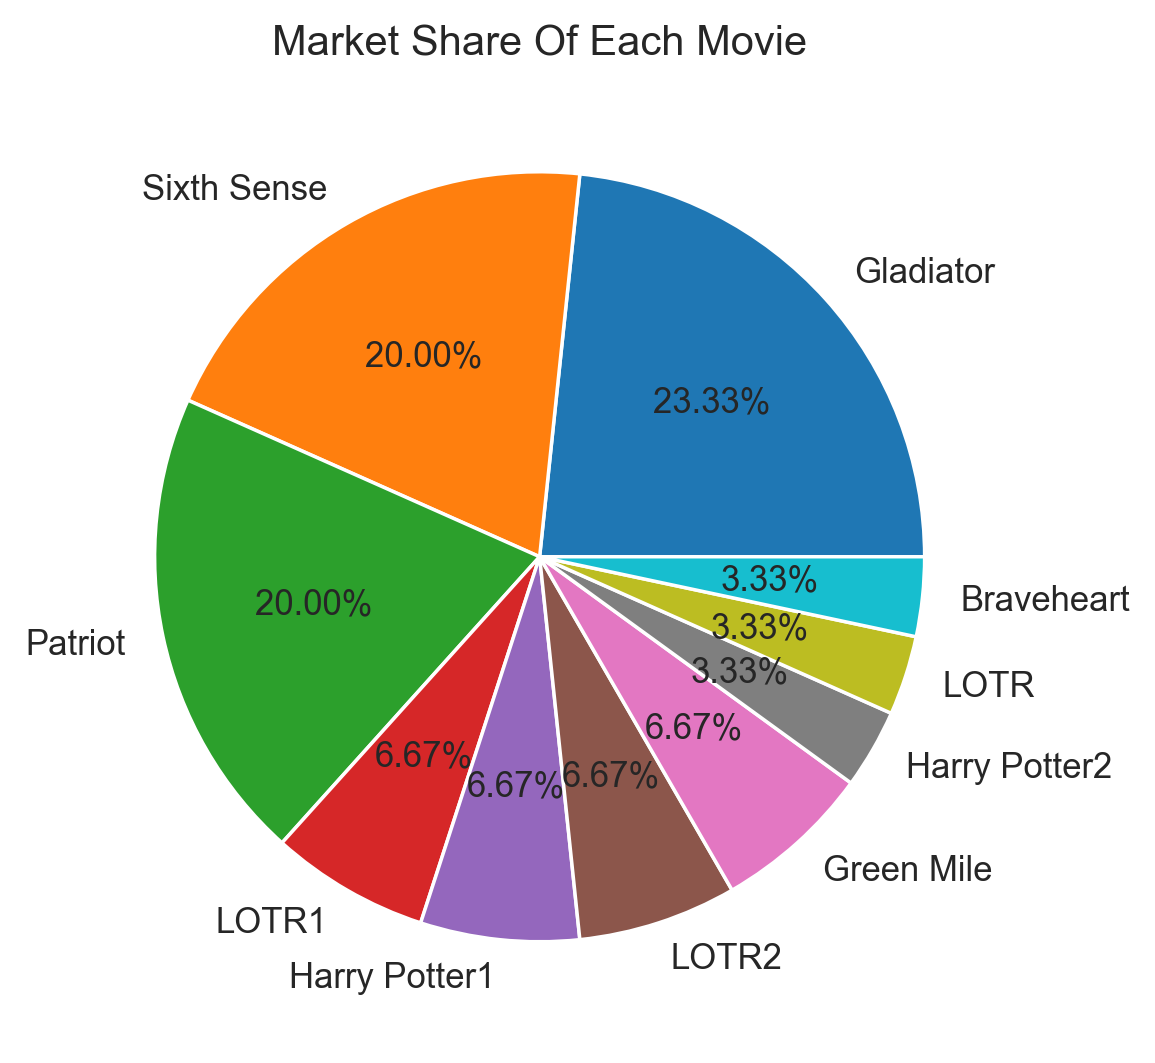

In [11]:
plt.pie(count['count'], labels = count['items'], autopct = '%.2f%%')
plt.title('Market Share Of Each Movie')

## Appling Association Rule on Dataset

### Appling Association rules with 20% Support

In [29]:
sp_20 = apriori(mm, min_support = 0.2, use_colnames = True)

sp_20

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Sixth Sense, Gladiator)"
8,0.4,"(Sixth Sense, Patriot)"
9,0.2,"(Sixth Sense, Green Mile)"


#### Creating Rules With 20% Support

In [30]:
model_20 = association_rules(sp_20, metric='lift')

model_20

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000
5,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000


#### Dropping Rules Lower than 1 Lift Value

In [31]:
model_20.sort_values('lift', ascending = False, inplace = True)
model_20_lift1 = model_20[model_20.lift>1]
model_20_lift1.reset_index(inplace = True)

model_20_lift1

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
1,9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
2,4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000
3,5,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
4,6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
5,7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
6,11,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
7,14,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4,1.000000
8,10,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
9,15,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5,0.625000


- there are no rules lower than 1 lift value

#### Visualization Of Obtained Rule

##### Ploting Scatter And BarPlot

In [32]:
vm_15 = pd.DataFrame(
    {
        'support' : model_20_lift1['support'],
        'confidence' : model_20_lift1['confidence'],
        'lift' : round(model_20_lift1['lift'])
    }
)

vm_15

,support,confidence,lift
0,0.2,1.000000,5.0
1,0.2,1.000000,5.0
2,0.2,0.333333,2.0
3,0.2,1.000000,2.0
4,0.6,0.857143,1.0
5,0.6,1.000000,1.0
6,0.4,1.000000,1.0
7,0.4,0.571429,1.0
8,0.4,0.800000,1.0
9,0.4,0.666667,1.0


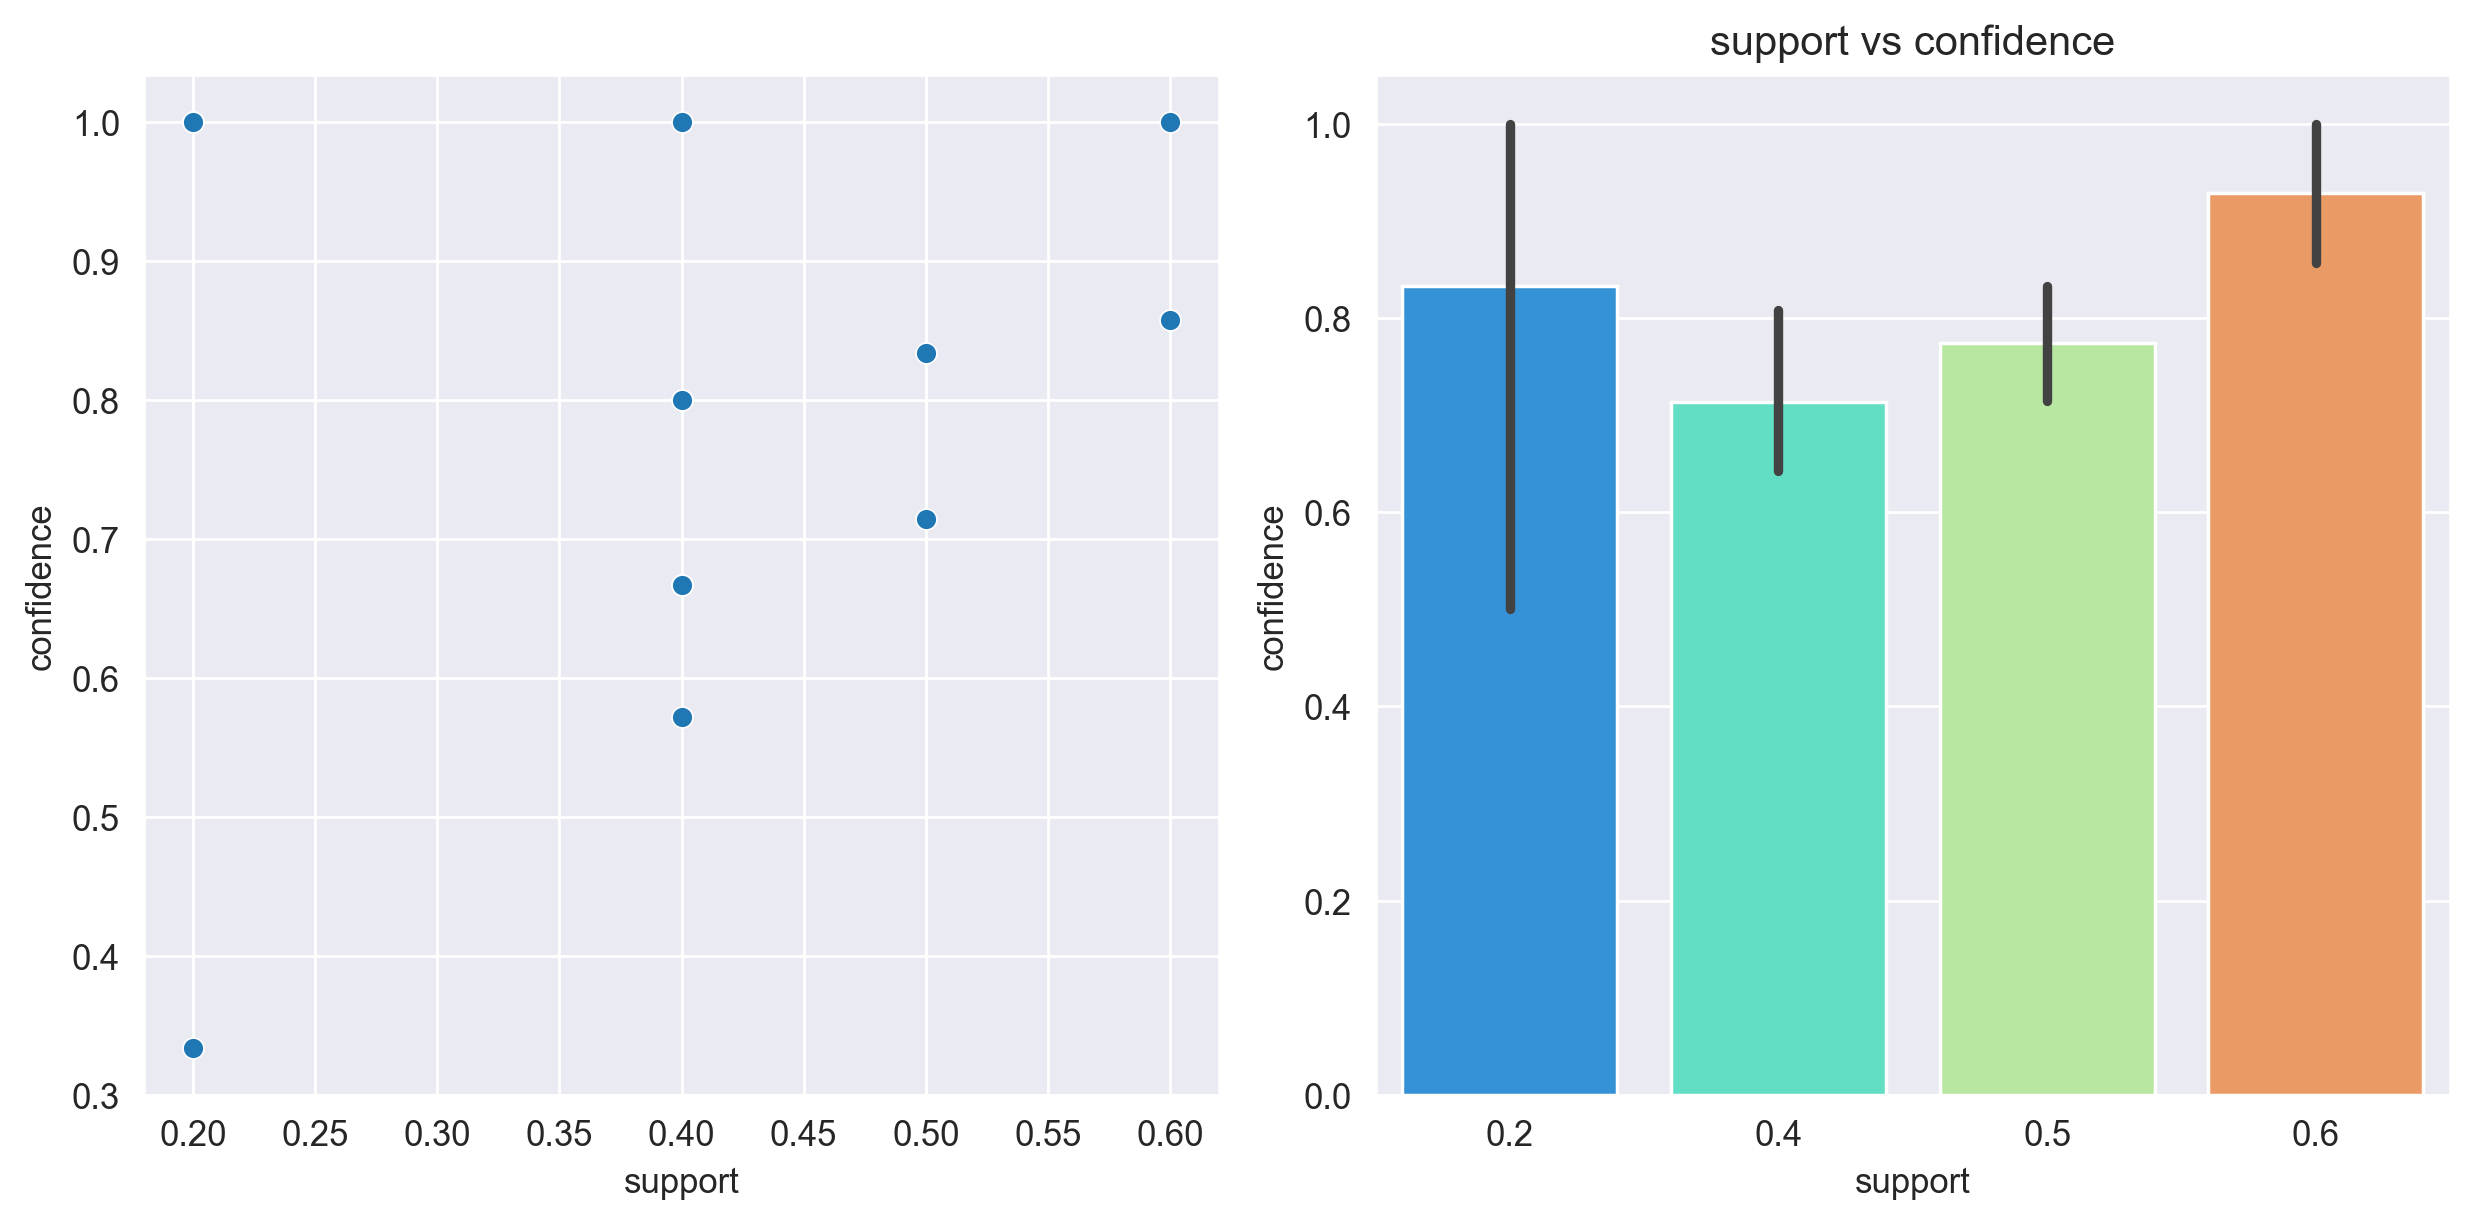

In [16]:
fig, ax = plt.subplots(ncols=2)

sns.scatterplot(vm_15['support'],vm_15['confidence'], palette='rainbow', ax= ax[0])
plt.title('support vs confidence')
sns.barplot(vm_15['support'],vm_15['confidence'], palette='rainbow', ax= ax[1])

plt.tight_layout()

##### Ploting Meatmap

Text(0.5, 1.0, 'HeatMap - ForLiftMatrix')

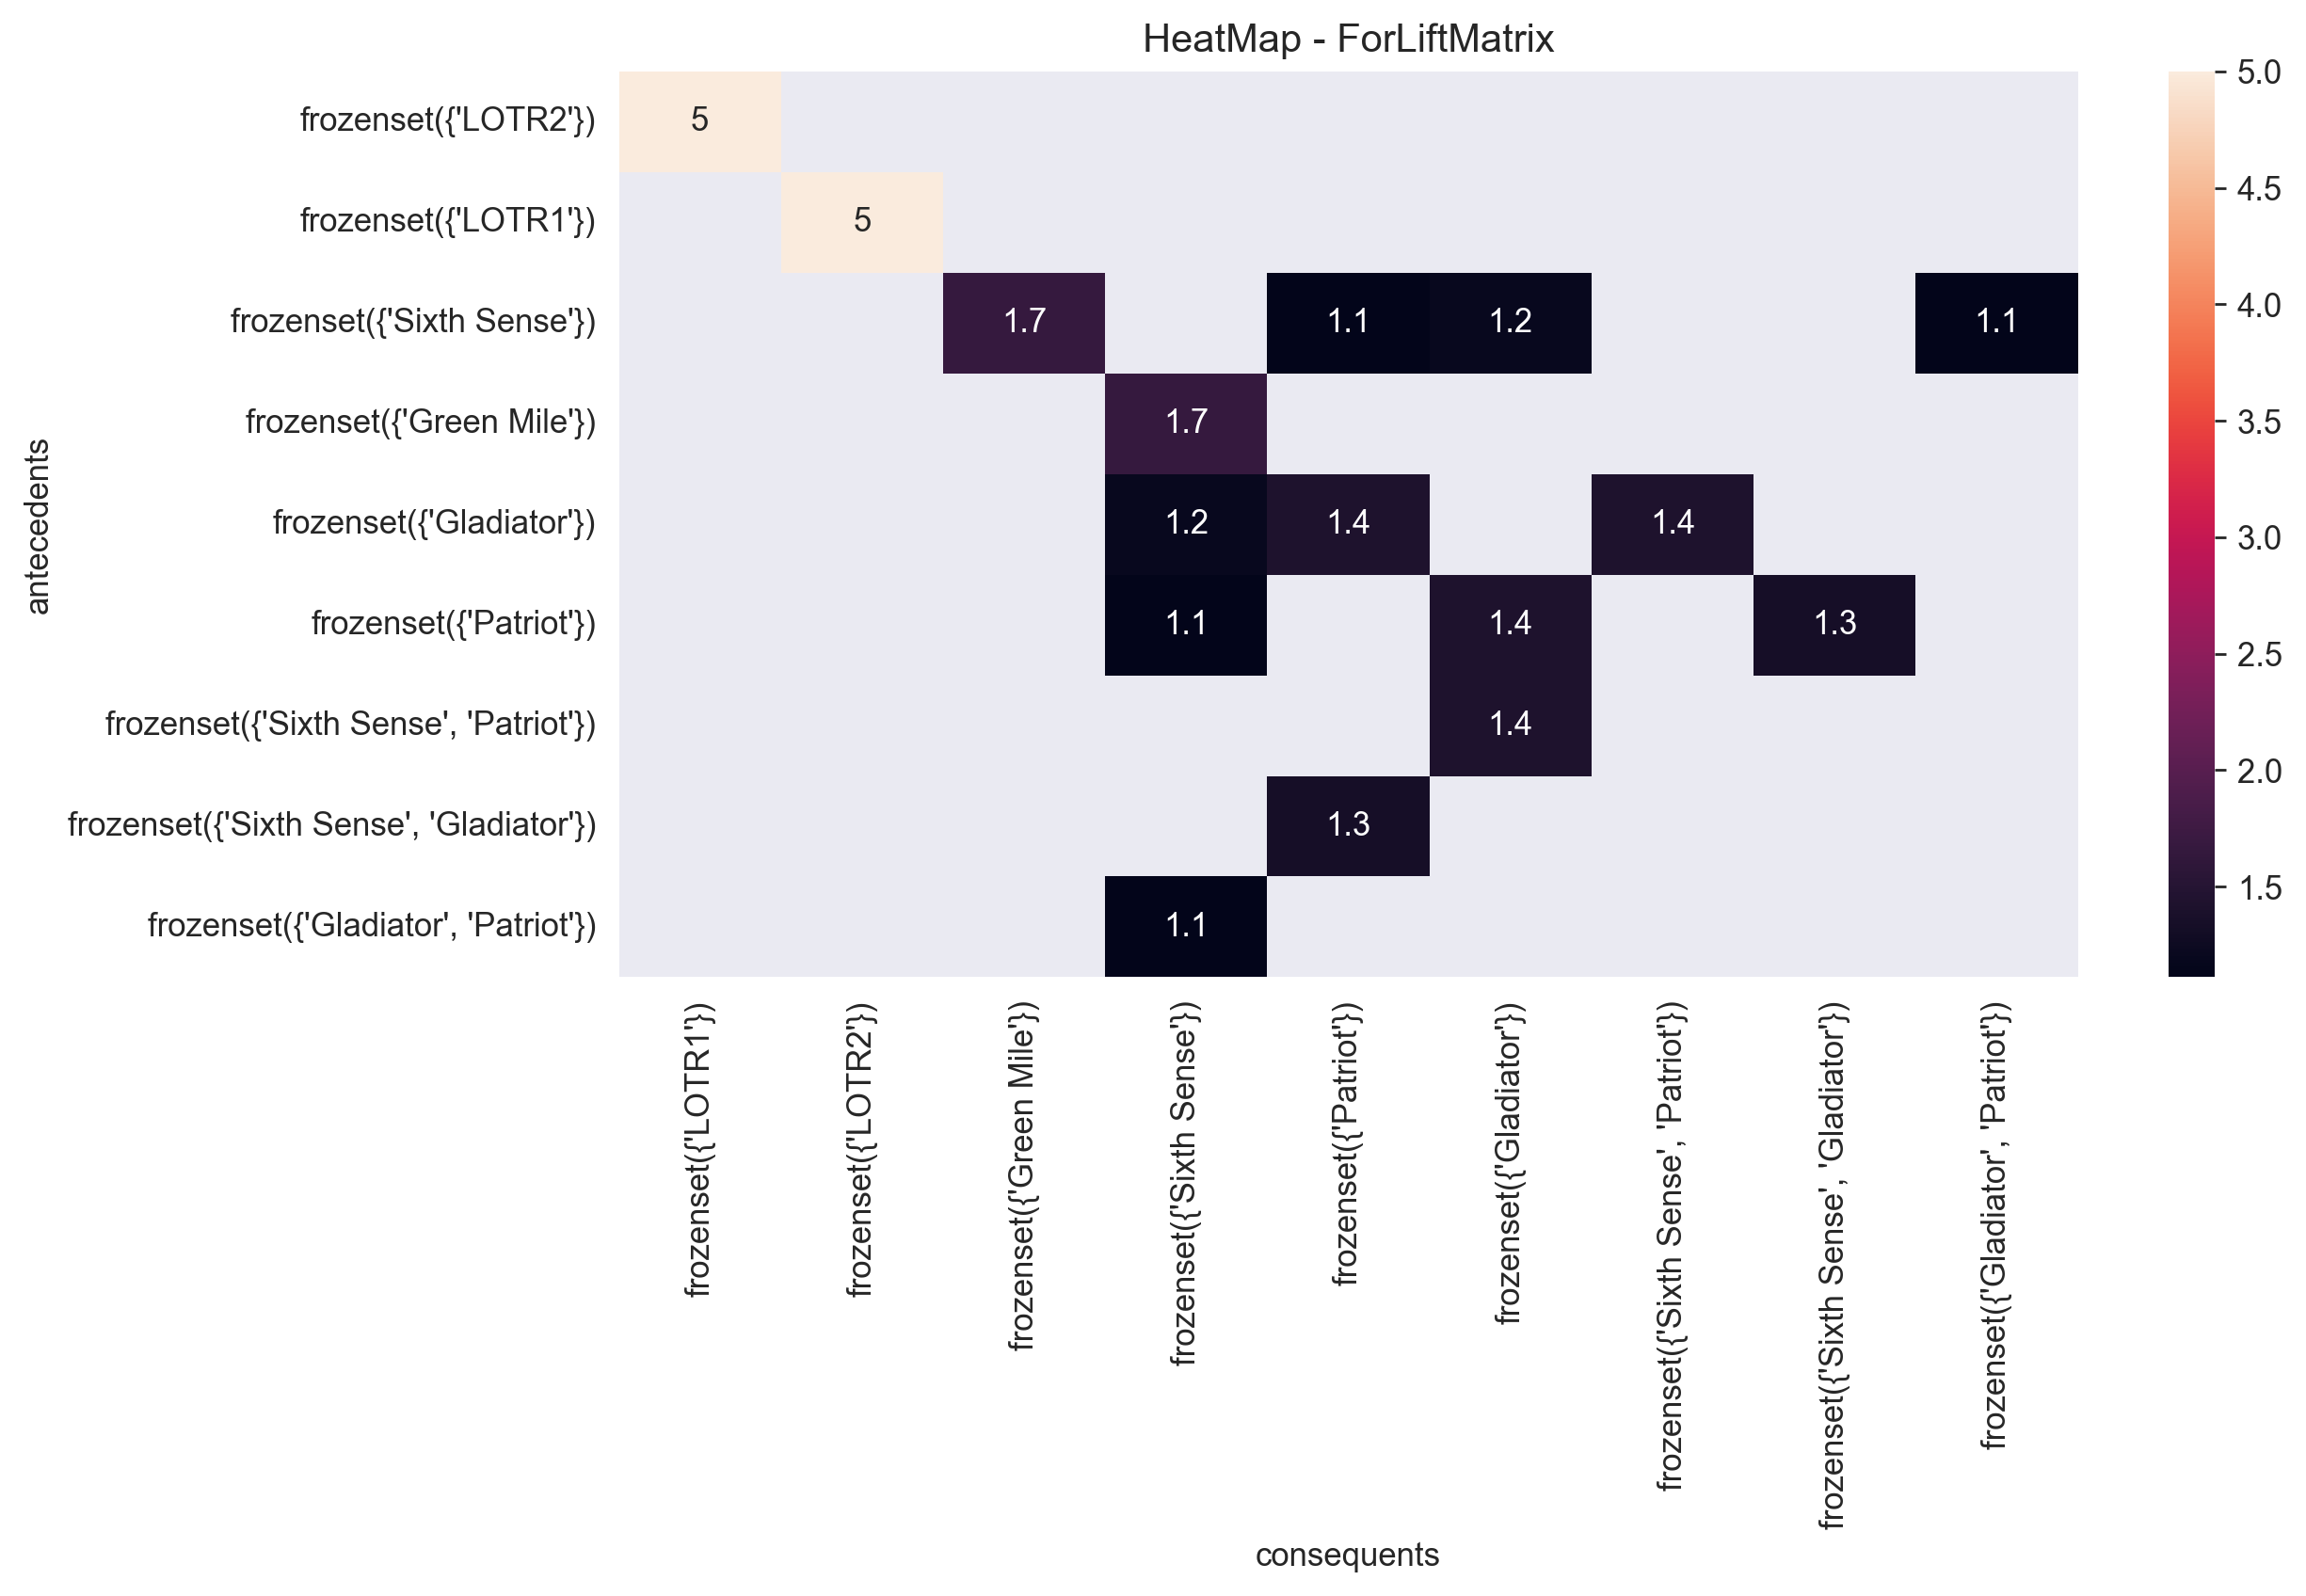

In [33]:
matrix_20 = model_20_lift1.pivot('antecedents','consequents','lift')
sns.heatmap(matrix_20, annot=True)
plt.title('HeatMap - ForLiftMatrix')

### Appling Association rules with 40% Support

In [34]:
sp_40 = apriori(mm, min_support = 0.4, use_colnames = True)

sp_40

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Sixth Sense, Gladiator)"
4,0.4,"(Sixth Sense, Patriot)"
5,0.6,"(Gladiator, Patriot)"
6,0.4,"(Sixth Sense, Gladiator, Patriot)"


#### Creating Rules With 40% Support

In [35]:
model_40 = association_rules(sp_40, metric='lift')

model_40

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
6,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
7,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
8,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
9,(Sixth Sense),"(Gladiator, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000


#### Dropping Rules Lower than 1 Lift Value

In [36]:
model_40.sort_values('lift', ascending = False, inplace = True)
model_40_lift1 = model_40[model_40.lift>1]
model_40_lift1.reset_index(inplace = True)

model_40_lift1

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
1,5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
2,7,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
3,10,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4,1.000000
4,6,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
5,11,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5,0.625000
6,0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
7,1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
8,2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
9,3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000


- there are no rules lower than 1 lift value

#### Visualization Of Obtained Rule

##### Ploting Scatter And BarPlot

In [37]:
vm_15 = pd.DataFrame(
    {
        'support' : model_40_lift1['support'],
        'confidence' : model_40_lift1['confidence'],
        'lift' : round(model_40_lift1['lift'])
    }
)

vm_15

,support,confidence,lift
0,0.6,0.857143,1.0
1,0.6,1.000000,1.0
2,0.4,1.000000,1.0
3,0.4,0.571429,1.0
4,0.4,0.800000,1.0
5,0.4,0.666667,1.0
6,0.5,0.833333,1.0
7,0.5,0.714286,1.0
8,0.4,0.666667,1.0
9,0.4,0.666667,1.0


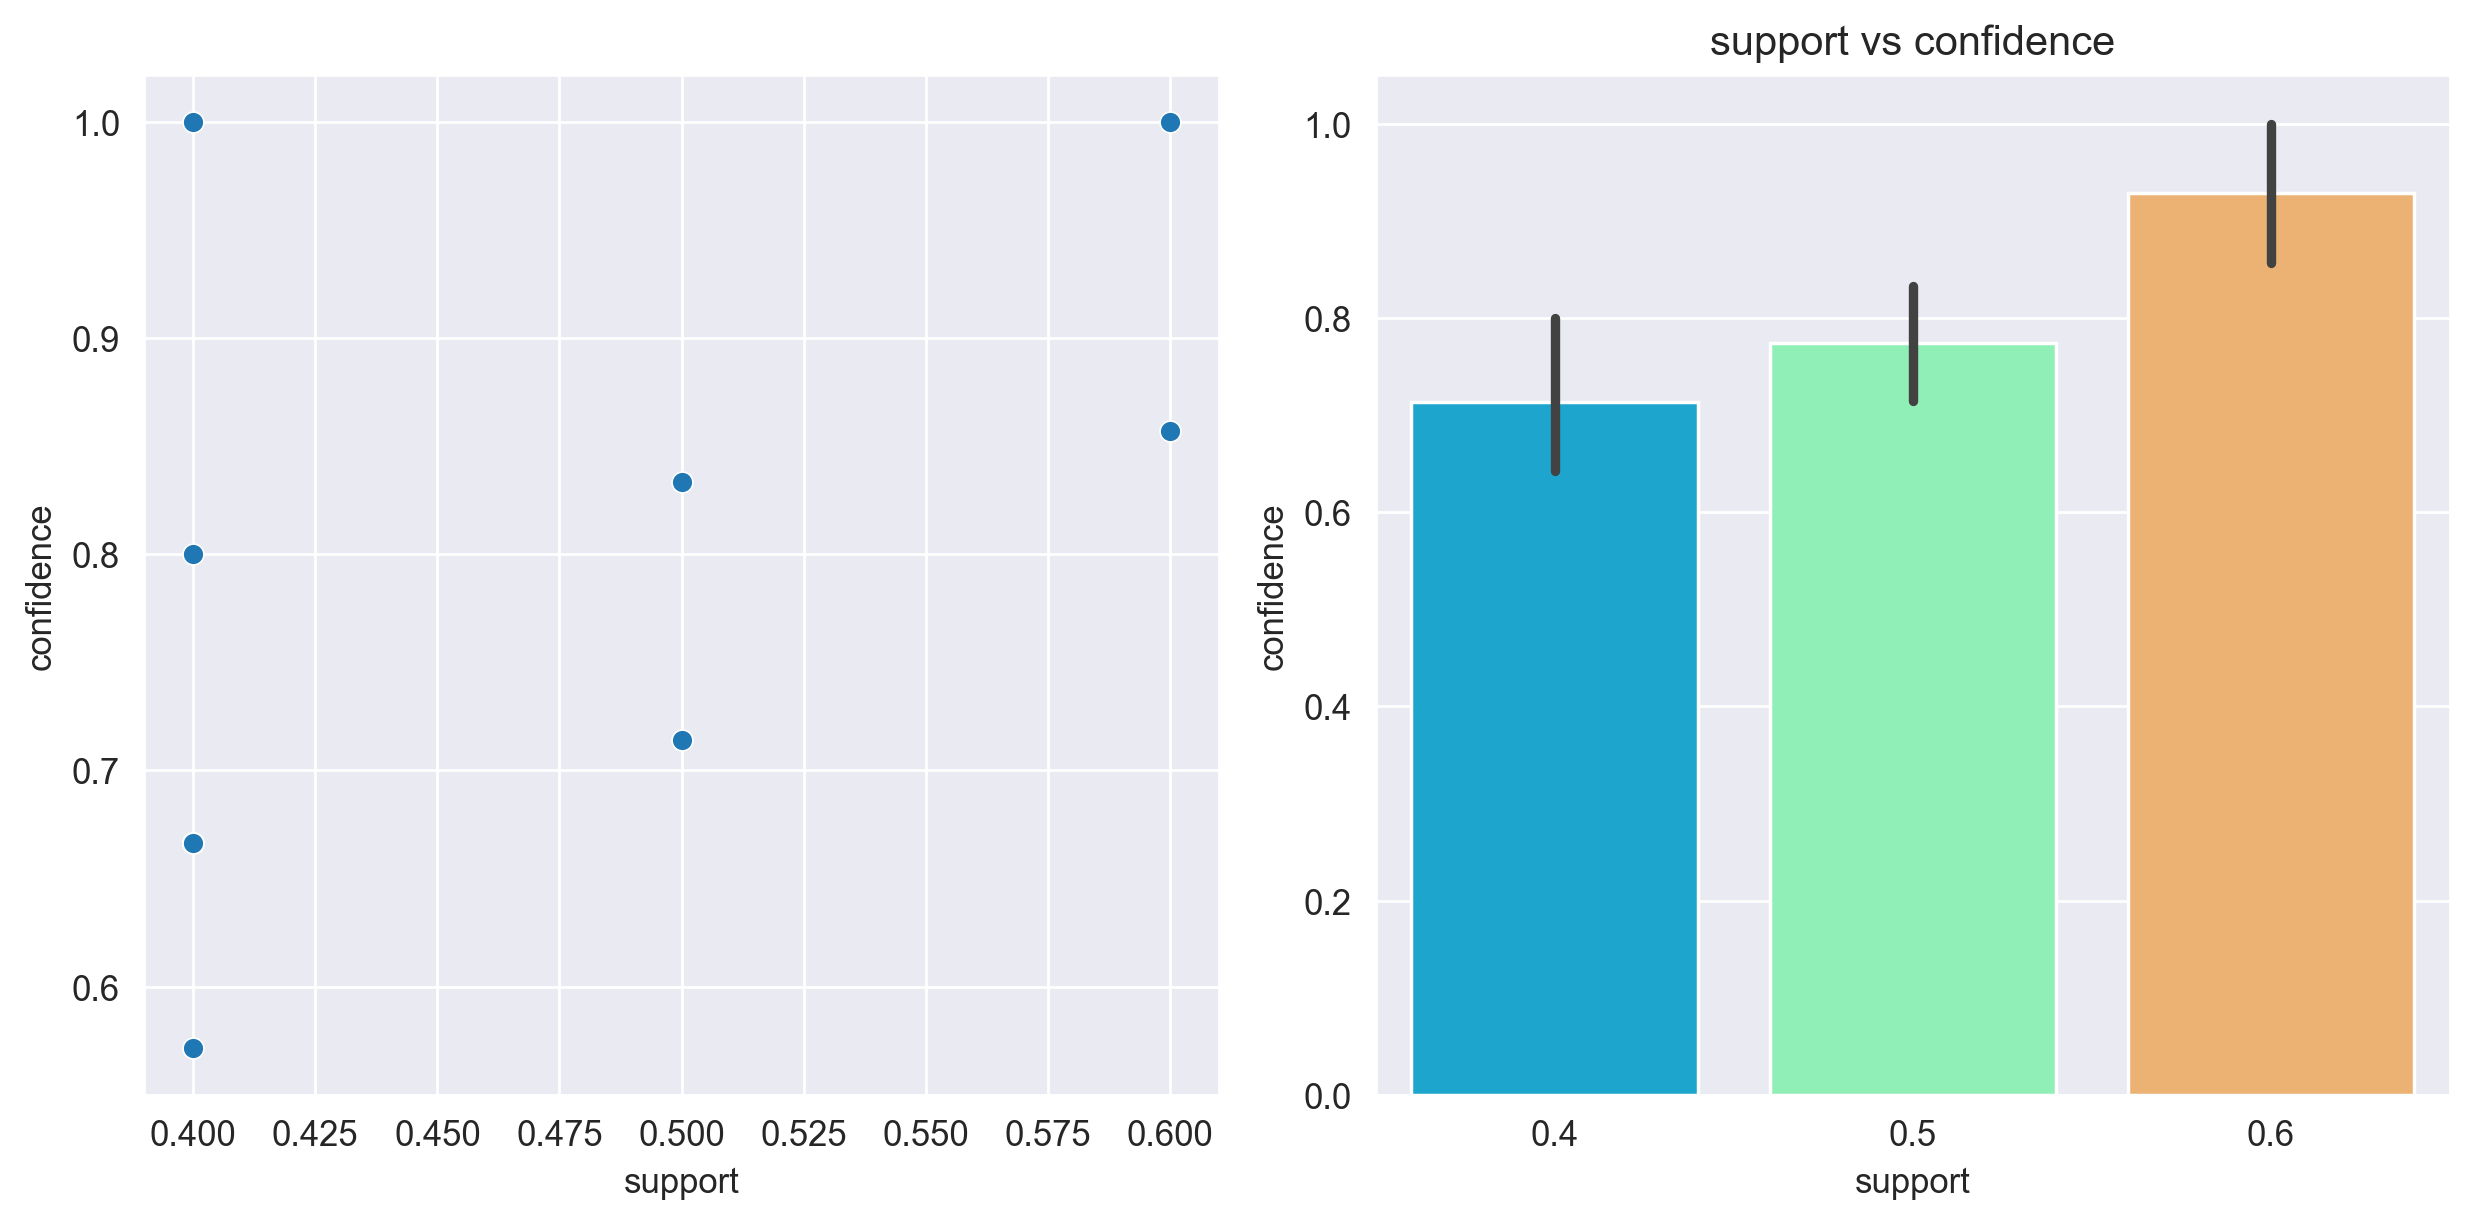

In [38]:
fig, ax = plt.subplots(ncols=2)

sns.scatterplot(vm_15['support'],vm_15['confidence'], palette='rainbow', ax= ax[0])
plt.title('support vs confidence')
sns.barplot(vm_15['support'],vm_15['confidence'], palette='rainbow', ax= ax[1])

plt.tight_layout()

##### Ploting Meatmap

Text(0.5, 1.0, 'HeatMap - ForLiftMatrix')

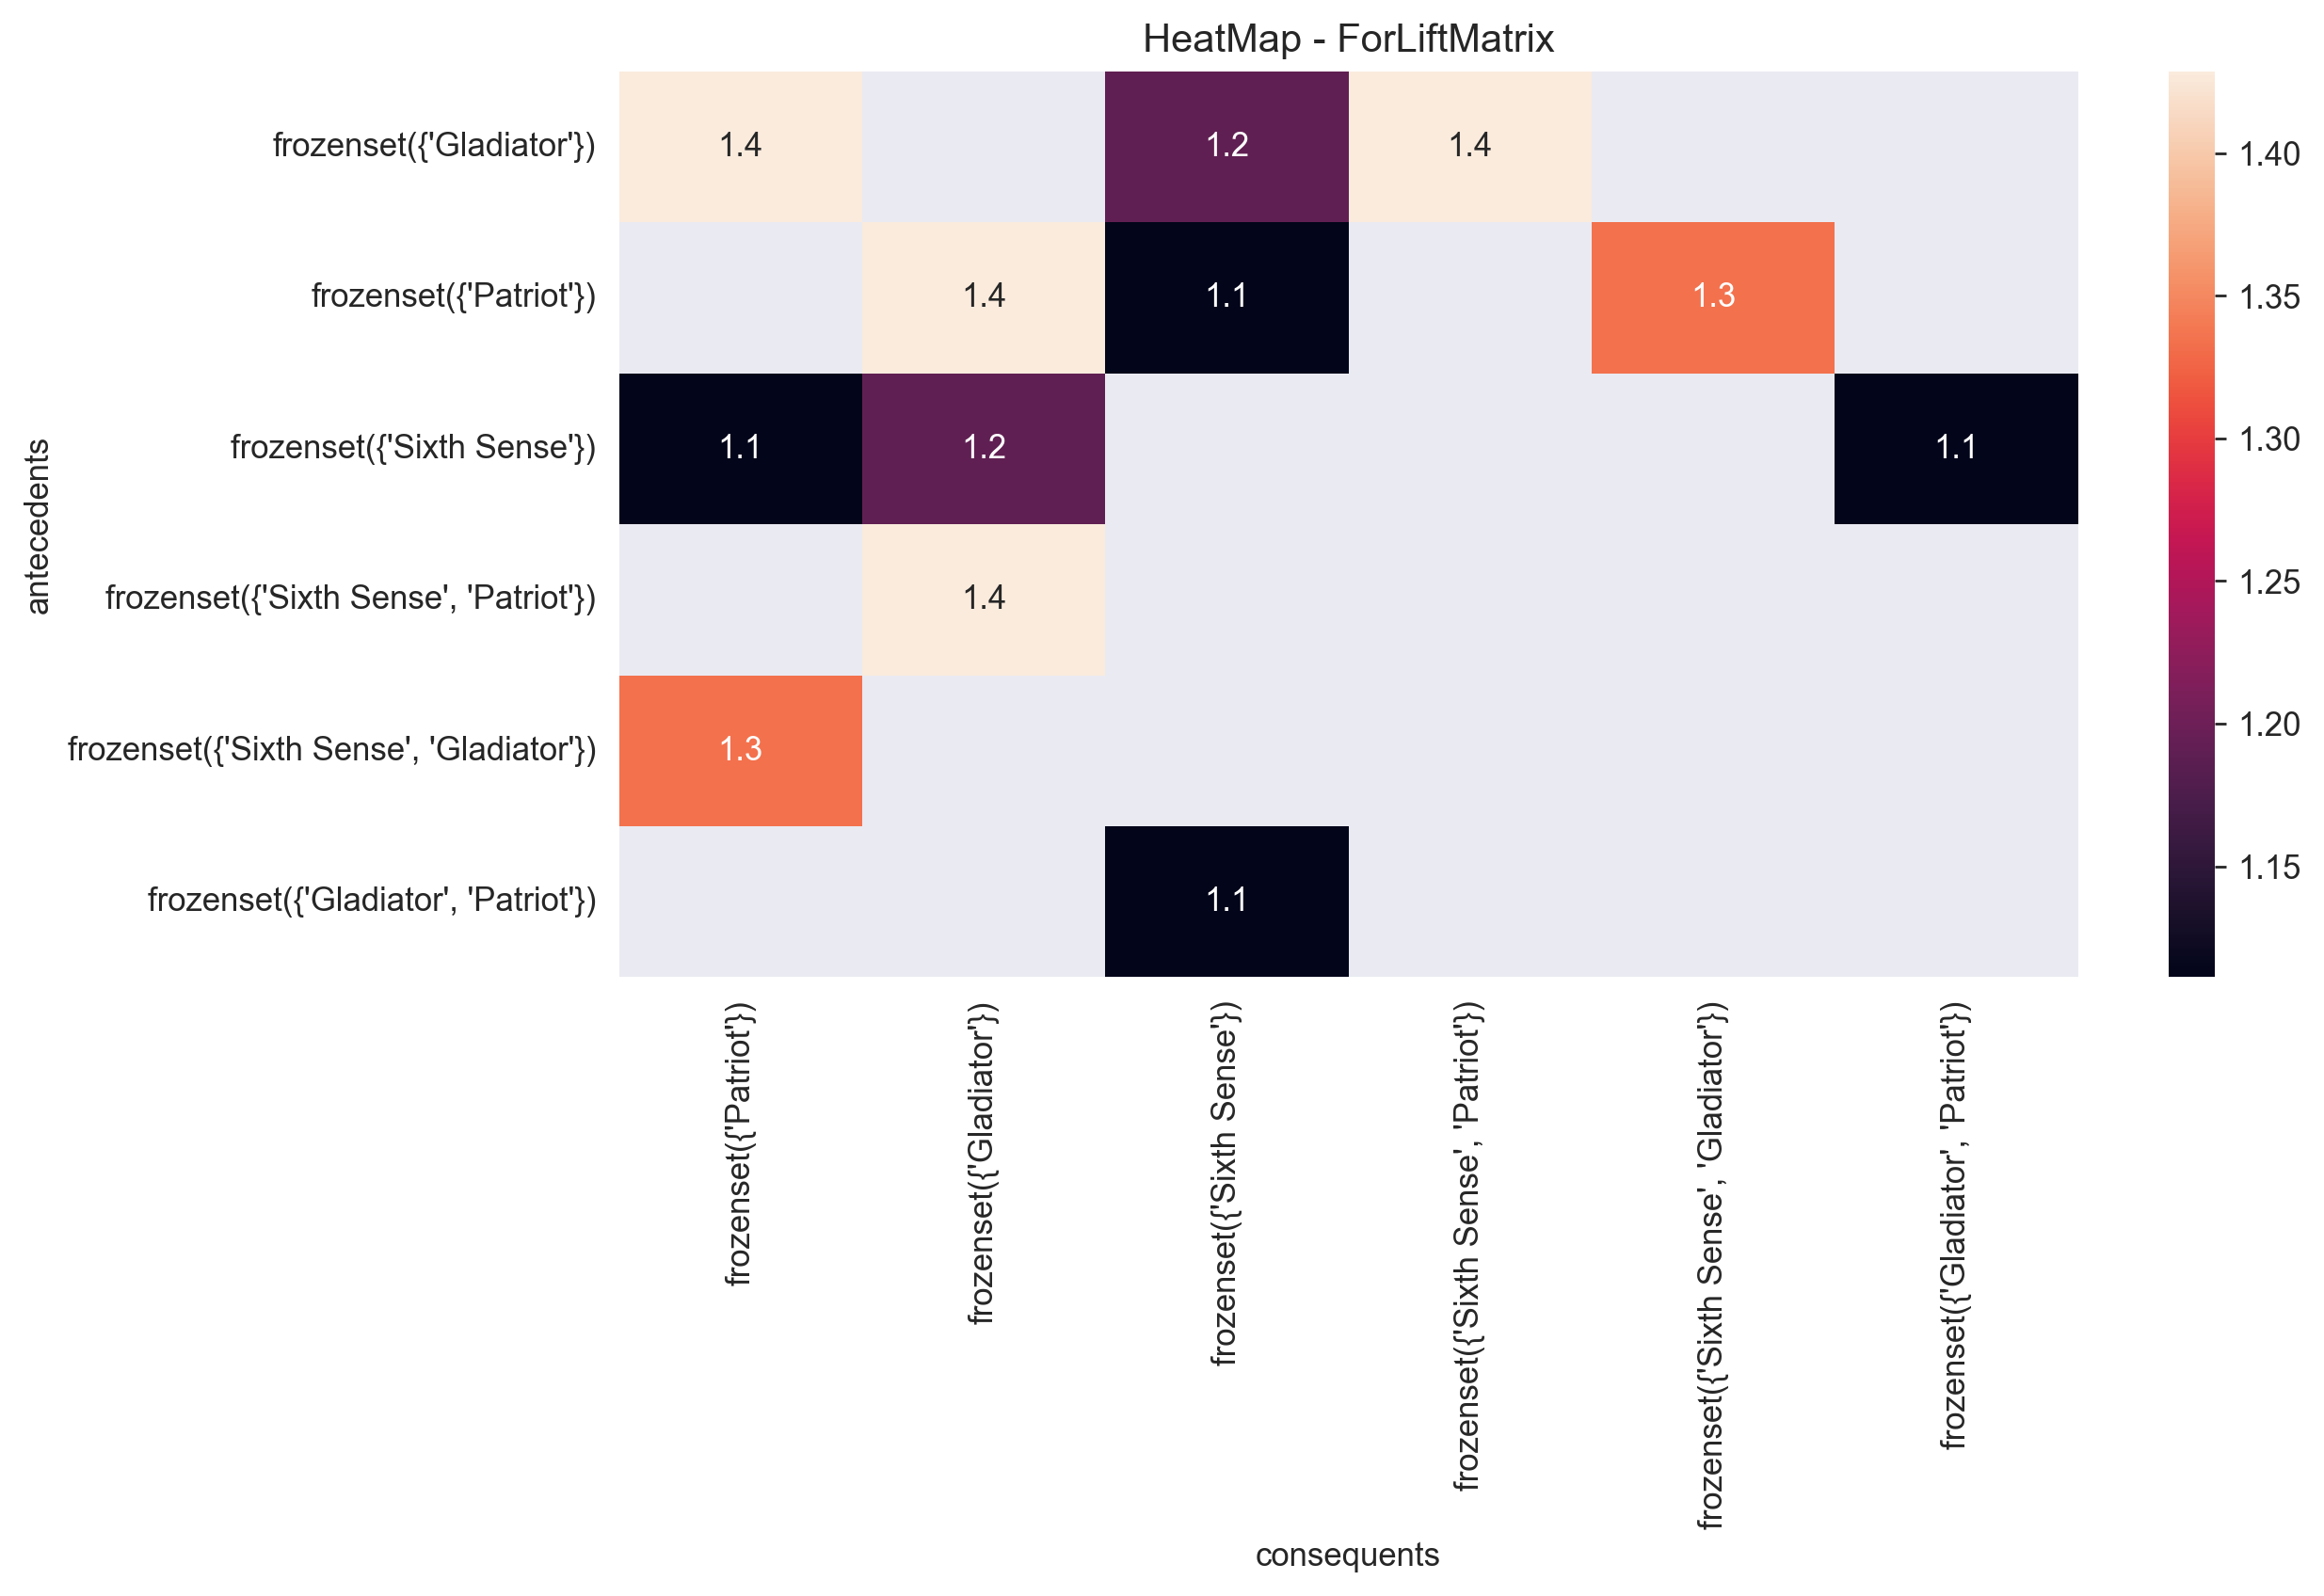

In [39]:
matrix_40 = model_40_lift1.pivot('antecedents','consequents','lift')
sns.heatmap(matrix_40, annot=True)
plt.title('HeatMap - ForLiftMatrix')

### Appling Association rules with 60% Support

In [40]:
sp_60 = apriori(mm, min_support = 0.6, use_colnames = True)

sp_60

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,"(Gladiator, Patriot)"


#### Creating Rules With 60% Support

In [41]:
model_60 = association_rules(sp_60, metric='lift')

model_60

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.00
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.75


#### Dropping Rules Lower than 1 Lift Value

In [42]:
model_60.sort_values('lift', ascending = False, inplace = True)
model_60_lift1 = model_60[model_60.lift>1]
model_60_lift1.reset_index(inplace = True)

model_60_lift1

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,0,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.00
1,1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.75


- there are no rules lower than 1 lift value

#### Visualization Of Obtained Rule

##### Ploting Scatter And BarPlot

In [43]:
vm_15 = pd.DataFrame(
    {
        'support' : model_60_lift1['support'],
        'confidence' : model_60_lift1['confidence'],
        'lift' : round(model_60_lift1['lift'])
    }
)

vm_15

,support,confidence,lift
0,0.6,0.857143,1.0
1,0.6,1.000000,1.0


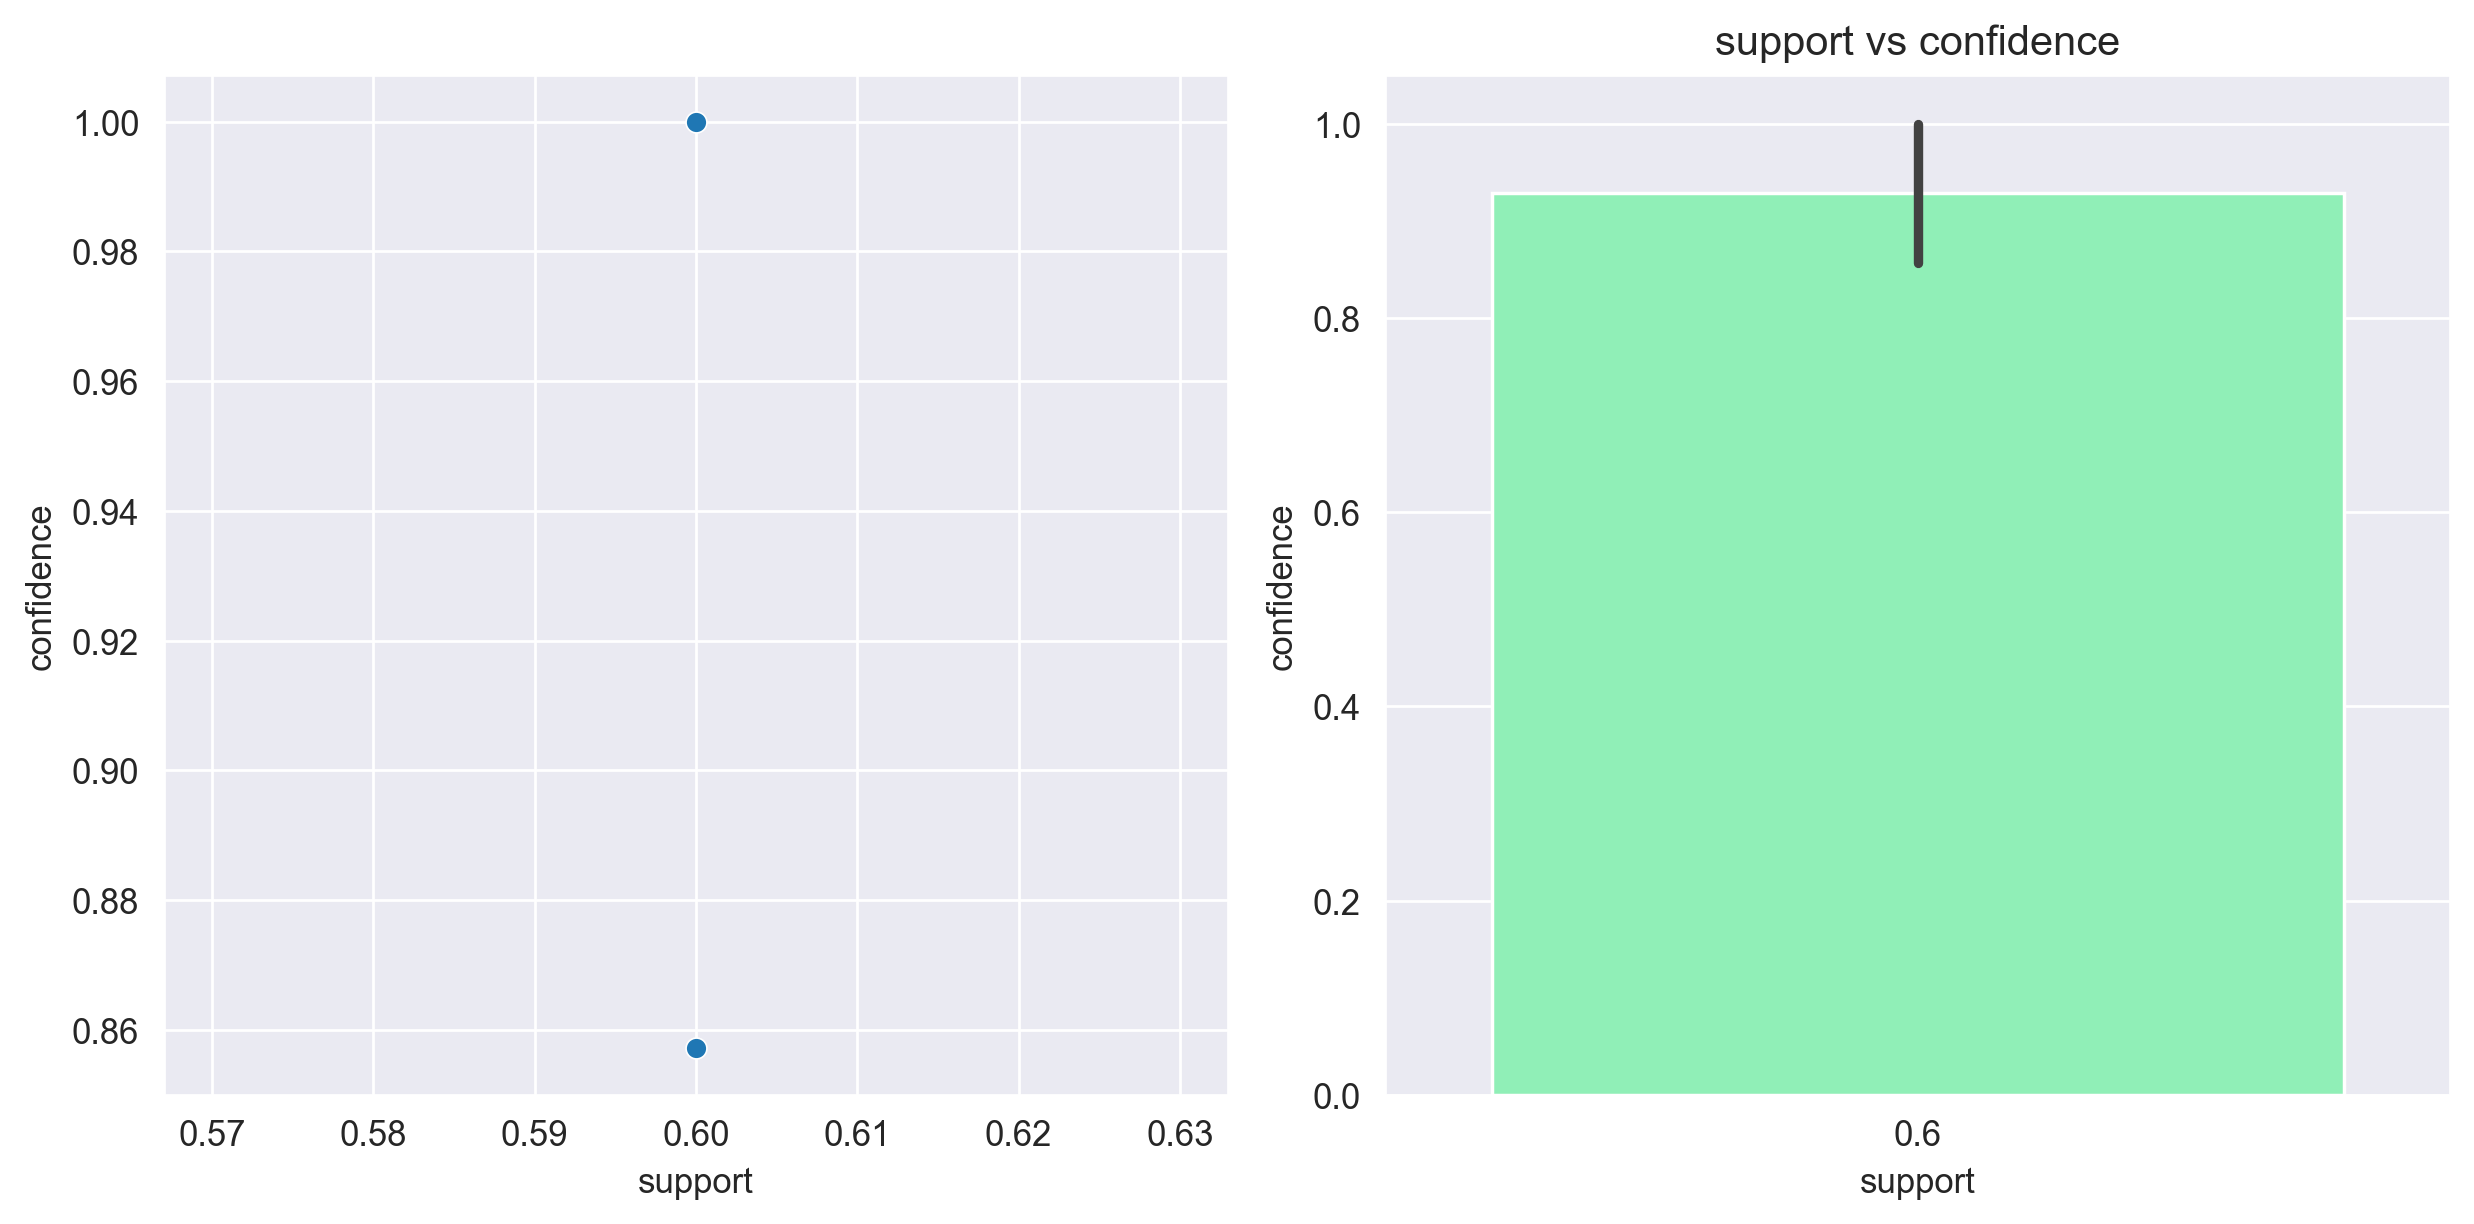

In [44]:
fig, ax = plt.subplots(ncols=2)

sns.scatterplot(vm_15['support'],vm_15['confidence'], palette='rainbow', ax= ax[0])
plt.title('support vs confidence')
sns.barplot(vm_15['support'],vm_15['confidence'], palette='rainbow', ax= ax[1])

plt.tight_layout()

##### Ploting Meatmap

Text(0.5, 1.0, 'HeatMap - ForLiftMatrix')

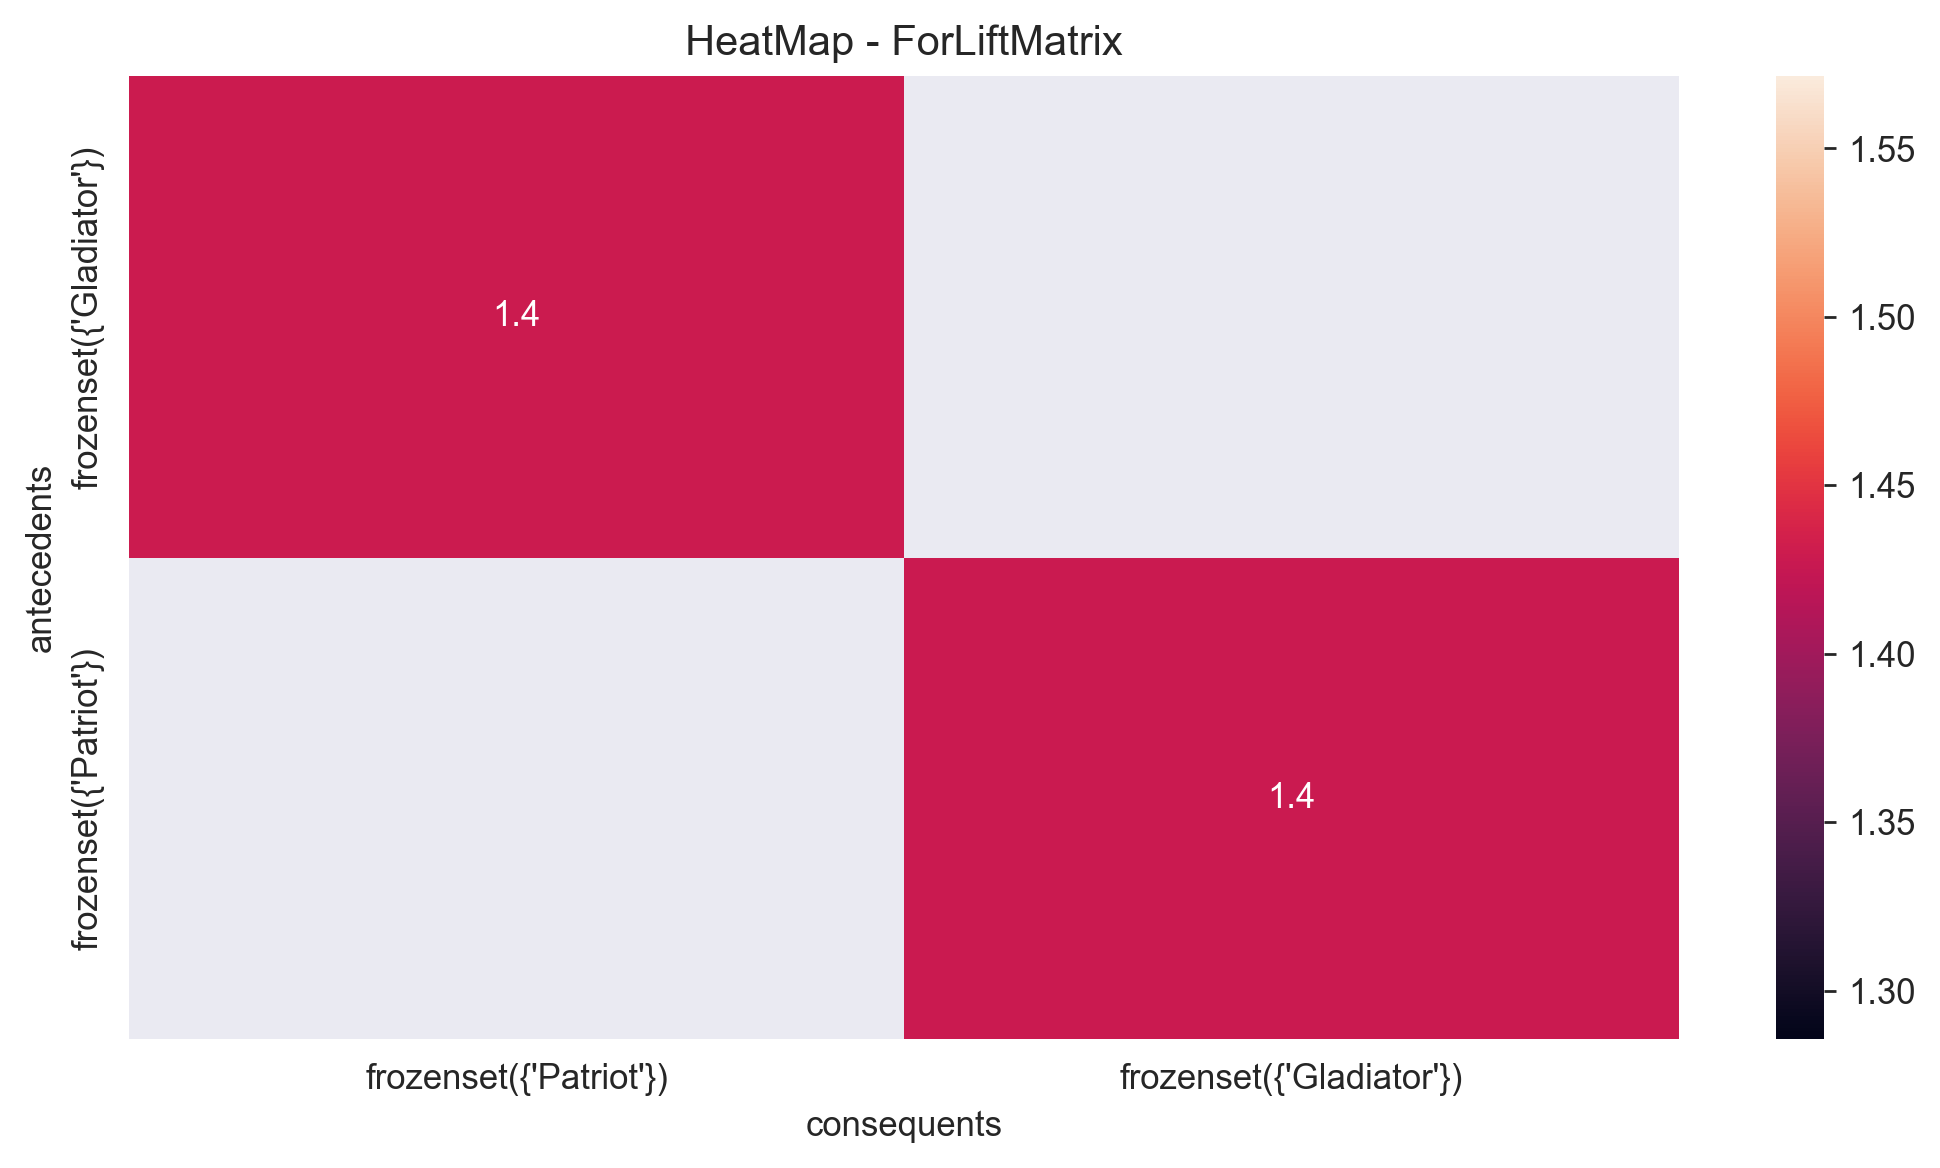

In [46]:
matrix_60 = model_60_lift1.pivot('antecedents','consequents','lift')
sns.heatmap(matrix_60, annot=True)
plt.title('HeatMap - ForLiftMatrix')